In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [65]:
df = pd.read_csv('data/WorldCups.csv')

In [66]:
df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [67]:
df.Winner.value_counts(False)

Brazil        5
Italy         4
Germany FR    3
Argentina     2
Uruguay       2
Spain         1
Germany       1
France        1
England       1
Name: Winner, dtype: int64

In [68]:
df['Attendance'] = df['Attendance'].map(lambda x:"".join([c for c in x if c!='.'])).astype(int)

In [69]:
X = df[['GoalsScored',
 'QualifiedTeams',
 'MatchesPlayed',
 'Attendance']].copy()

In [70]:
X.head()

,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,70,13,18,590549
1,70,16,17,363000
2,84,15,18,375700
3,88,13,22,1045246
4,140,16,26,768607


In [71]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

In [72]:
sc = StandardScaler()
Xs = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [73]:
pca= PCA(n_components=2)

In [74]:
pca.fit(Xs)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [75]:
pca.explained_variance_ratio_.cumsum()

array([0.90997119, 0.96771414])

In [76]:
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

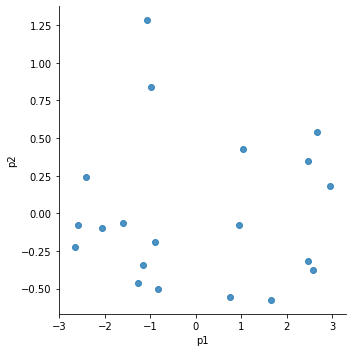

In [77]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

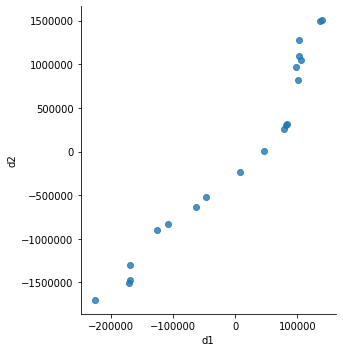

In [78]:
mds = MDS(n_components=2,n_jobs=-1)
Xm = pd.DataFrame(mds.fit_transform(X),columns=['d1','d2'])
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False)

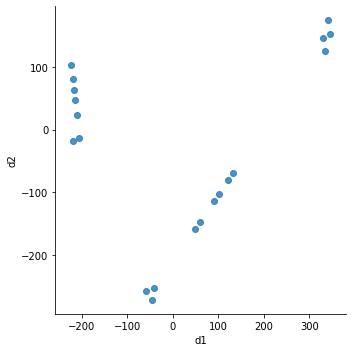

In [79]:
tsne = TSNE(n_components=2,n_jobs=-1,perplexity=2)
Xt = pd.DataFrame(tsne.fit_transform(X),columns=['d1','d2'])
sns.lmplot(data=Xt,x='d1',y='d2',fit_reg=False)

In [80]:
sc = MinMaxScaler()

In [81]:
Xmm = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [83]:
Xmm.describe()

,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
count,20.000000,20.000000,20.000000,20.000000
mean,0.484653,0.434211,0.527660,0.468248
std,0.326464,0.382545,0.366356,0.332402
min,0.000000,0.000000,0.000000,0.000000
25%,0.188119,0.157895,0.287234,0.158730
50%,0.500000,0.157895,0.446809,0.425445
75%,0.745050,0.684211,0.808511,0.732562
max,1.000000,1.000000,1.000000,1.000000


In [85]:
from sklearn.cluster import KMeans

In [158]:
km = KMeans(n_clusters=6)

In [159]:
km.fit(Xmm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [160]:
Xmm['cl'] = Xp['cl'] = df['cl'] = Xm['cl'] = Xt['cl'] = km.predict(Xmm)

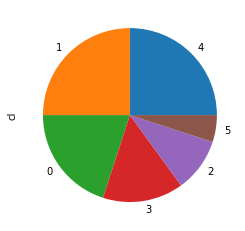

In [161]:
Xp.cl.value_counts(True).plot(kind='pie')

In [162]:
km.cluster_centers_

array([[0.07920792, 0.06578947, 0.03723404, 0.07152149, 4.        ],
       [0.88118812, 1.        , 1.        , 0.84355663, 1.        ],
       [0.62376238, 0.15789474, 0.28723404, 0.13372722, 3.        ],
       [0.6039604 , 0.57894737, 0.74468085, 0.61310788, 0.        ],
       [0.24158416, 0.15789474, 0.37021277, 0.35086118, 2.        ],
       [0.7029703 , 0.57894737, 0.74468085, 1.        , 5.        ]])

IndexError: invalid index to scalar variable.

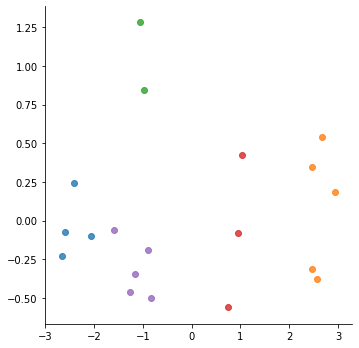

In [163]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='cl')

IndexError: invalid index to scalar variable.

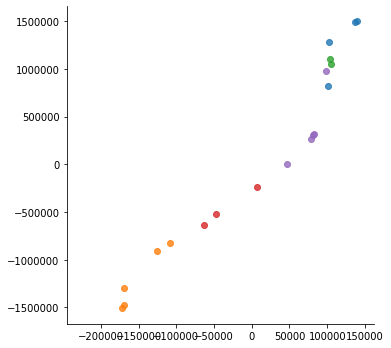

In [164]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False,hue='cl')

IndexError: invalid index to scalar variable.

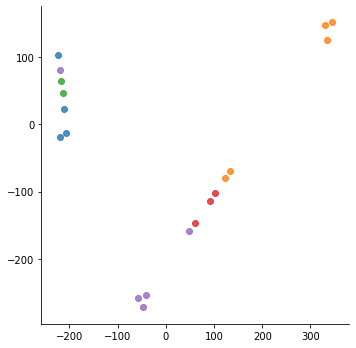

In [165]:
sns.lmplot(data=Xt,x='d1',y='d2',fit_reg=False,hue='cl')

In [166]:
df.groupby('cl').mean()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
cl,,,,,
0,1938.0,78.0,14.25,18.75,5.936238e+05
1,2006.0,159.0,32.00,64.00,3.083080e+06
2,1956.0,133.0,16.00,30.50,7.942085e+05
3,1986.0,131.0,24.00,52.00,2.339990e+06
4,1970.0,94.4,16.00,34.40,1.494365e+06
5,1994.0,141.0,24.00,52.00,3.587538e+06


In [167]:
df.mean().to_frame().T

,Year,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,cl
0,1974.8,118.95,21.25,41.8,1872882.35,2.15


In [174]:
df.loc[df.cl==5]['Year'].value_counts().sort_index()

1994    1
Name: Year, dtype: int64

In [175]:
df.loc[df.cl==5]

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,cl
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3587538,5


In [177]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


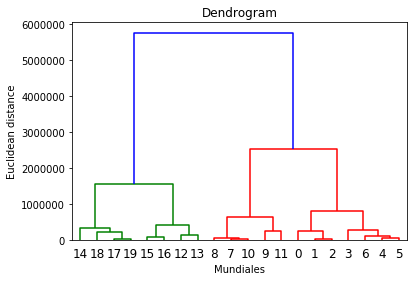

In [184]:

dendrogram = sch.dendrogram(sch.linkage(X,
                                        method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Mundiales')
plt.ylabel('Euclidean distance')
plt.show()

In [186]:
df.loc[df.index==14]

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,cl
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3587538,5


In [185]:
X.corr()

,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
GoalsScored,1.000000,0.866201,0.876201,0.774670
QualifiedTeams,0.866201,1.000000,0.949164,0.875360
MatchesPlayed,0.876201,0.949164,1.000000,0.933243
Attendance,0.774670,0.875360,0.933243,1.000000
